## Acceso a Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.4 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode

## Funciones

In [ ]:
def clean_text(text):
    # Expresión regular para encontrar todas las cadenas que empiezan con "https://t.co/" y tienen uno o más caracteres que no son espacios en blanco.
    pattern = r'https://t.co/[^\s]+|@[a-zA-Z0-9_]{1,15}|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+|[^\w\s]'

    # Reemplaza todas las cadenas que coinciden con la expresión regular por una cadena vacía.
    clean_text = re.sub(pattern, '', text)

    # Convertir todas las letras a minúsculas
    clean_text = clean_text.lower()

    return clean_text

## Leyendo datos

In [ ]:
text_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs/train_data.csv", names=['image', 'text'],header=None)
labels_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs/train_labels_subtask_1.csv", names=['labels'],header=None)

d = {'image':text_df['image'].values, 'text':text_df['text'].values, 'labels':labels_df['labels'].values}
df = pd.DataFrame(data = d)

pd.set_option('display.max_colwidth',None)
df.head(5)

,image,text,labels
0,['E_f1Fl-XMAMPFkT.jpg'],Morales: #EEUU “sufrió una derrota vergonzosa” ante el terrorismo y el narcotráfico #NarcoterrorismoDoméstico https://t.co/GCenoztH3H https://t.co/WMF36c68i3,0
1,['E8NYFP5WYAEpNRb.jpg'],"Tus acciones te hacen ser una bella persona, no tu color de piel o tu dinero, esa joven con su hermoso gesto me robo el corazon. https://t.co/wXfw2Hrqv7",0
2,['E_BP33UXoAYQcTI.png'],"#Seguridad 🚨🛑 Detuvo policía municipal a dos hombres por robo a casa habitación, en #Puebla. En la acción se recuperaron computadoras portátiles, un equipo de audio, un dispositivo de comunicación móvil, entre otros artículos. Urbano| Noticias https://t.co/xXKSnVjz8k... https://t.co/HcoPbEpPLk",1
3,['E_XFlhCXIAAl-GR.jpg'],20 años del accidente que convirtió a Alex Zanardi en leyenda. https://t.co/TALvr20hB5,0
4,"['E_Gc6blX0AEnhW5.jpg', 'E_Gc3IzWQA046Zf.jpg']","¡Llega el castigo para Max Verstappen! El neerlandés tendrá tres posiciones de sanción en la parrilla de salida del #RussianGP, tras el accidente que protagonizó con Lewis Hamilton en el #ItalianGP ¿Qué opinan de la decisión de la FIA? | #F1 https://t.co/yfUlLPzcGL",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2996 non-null   object
 1   text    2996 non-null   object
 2   labels  2996 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.3+ KB


In [ ]:
df.isnull().sum()

image     0
text      0
labels    0
dtype: int64

## Limpieza de datos

In [ ]:
df_Preprocessing = df.copy()

In [ ]:
df_Preprocessing.drop('image', axis=1, inplace=True)

In [ ]:
# Aplica la función a la columna "text" del DataFrame "df".
df_Preprocessing['text'] = df_Preprocessing['text'].apply(clean_text)

In [ ]:
df_Preprocessing

,text,labels
0,morales eeuu sufrió una derrota vergonzosa ante el terrorismo y el narcotráfico narcoterrorismodoméstico,0
1,tus acciones te hacen ser una bella persona no tu color de piel o tu dinero esa joven con su hermoso gesto me robo el corazon,0
2,seguridad detuvo policía municipal a dos hombres por robo a casa habitación en puebla en la acción se recuperaron computadoras portátiles un equipo de audio un dispositivo de comunicación móvil entre otros artículos urbano noticias,1
3,20 años del accidente que convirtió a alex zanardi en leyenda,0
4,llega el castigo para max verstappen el neerlandés tendrá tres posiciones de sanción en la parrilla de salida del russiangp tras el accidente que protagonizó con lewis hamilton en el italiangp qué opinan de la decisión de la fia f1,0
...,...,...
2991,estan en su derecho de ser escuchados y conciliar por el accidente pero desde el momento que estan en carreras ilegales a mi parecer saben que estan expuestos a todo accidentes de todo tipo para eso existen lugares para ese tipo de competicion,0
2992,15 av y 5a calle zona 1 se produjo accidente de tres vehículos bomberos voluntarios 4a cía evaluaron a las personas resultaron ilesas,1
2993,detienen a 2 policías sudafricanos por asesinato de un joven con síndrome de down nathaniel julius adolescente de 16 años con síndrome de down fue asesinado el miércoles en eldorado park el joven había salido a comprar galletas a un vía eluniversal,1
2994,camionetaenllamas una camioneta se incendió en la colonia tabachines en el municipio de zapopan después de un accidente 𝙍𝙚𝙥𝙤𝙧𝙩𝙚𝘾𝙞𝙪𝙙𝙖𝙙𝙖𝙣𝙤𝙉𝙤𝙩𝙞𝙘𝙞𝙖𝙨,1


## Análisis exploratorio de datos

### Distribución de etiquetas

Text(0, 0.5, 'Count')

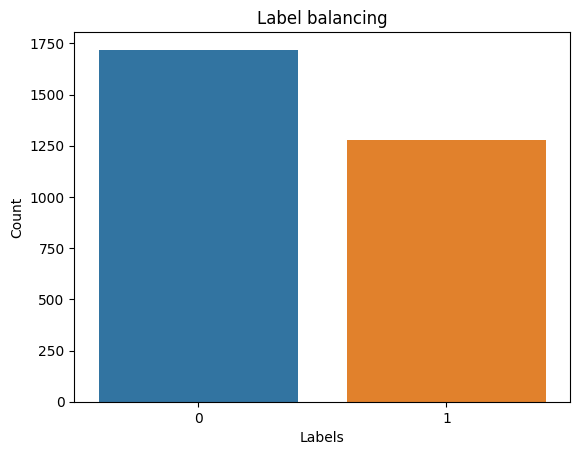

In [ ]:
fig = plt.figure(dpi=100)
ax = fig.gca()
sns.countplot(x='labels', data=df_Preprocessing, ax=ax)
ax.set_title("Label balancing")
ax.set_xlabel("Labels")
ax.set_ylabel("Count")

#### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

X = df_Preprocessing.drop('labels',axis=1)
Y = df_Preprocessing.labels

X_over , Y_over = undersample.fit_resample(X,Y)

Y_over = pd.DataFrame(data=Y_over)

dNew = {'text':X_over['text'].values, 'labels':Y_over['labels'].values}

# NO ME GUSTA QUE LOS DATOS ESTÁN ORDENADOS
df_Balanced = pd.DataFrame(data = dNew)

# mezclar los registros del DataFrame
df_Balanced = df_Balanced.sample(frac=1, random_state=42) # 42 es una semilla aleatoria para replicar el resultado

In [ ]:
df_Balanced

,text,labels
1266,ultimo organizaciones de derechos humanos en bolivia denuncian el incremento de amenazas violencia y ataques contra defensores de ddhh y periodistas exigen al gobierno de respetar y dar garantías a la labor que desempeñan dichas instituciones,0
1749,agregale y resulta que los amantes de lo ajeno no solo cometieron el robo y causaron daños en la iglesia san juan bosco de la colonia francisco i madero también saquearon la escuela urbano flores ubicada en ese mismo sector saltillo coahuila,1
2050,movilidadcauca popayan aestahora se presenta tráfico denso sobre la vía variante norte accidente de tránsito evitandoeltraficojuntos,1
393,participa miguel gonzález coordinador de organización a cargo del programa de cooperación delegada prevención de la violencia y el delito contra mujeres niñez y adolescencia previ ejecutado por y la seicmsj con apoyo de la,0
1544,entérate conductor escapa luego de chocar su camioneta contra carros que permanecían estacionados el accidente se registró en el cruce del bulevar revolución y calle francisco i madero en torreón,1
...,...,...
1638,aestahora se registra accidente de tránsito en la vía tunja villadeleyva a la altura del municipio de cucaita boyacá una moto y una camioneta chocaron y se espera asistencia de organismos de socorro,1
1095,es máxima de la historia que un gobierno que no está fundado en la opinión pública sino establecido y sostenidos por la corrupción y la violencia no puede existir sin amplios recursos para pagar a la soldados y para mantener a sus pensionados y partidarios jr poinsett,0
1130,el menor estaba haciendo un reto para esa red social se tragó por accidente los imanes redondos y tuvo que ser operado de urgencia para salvarle la vida noticia completa,0
1294,pereiraenvivonoticias se registró accidente de tránsito en la av sur con calle 25,1


Text(0, 0.5, 'Count')

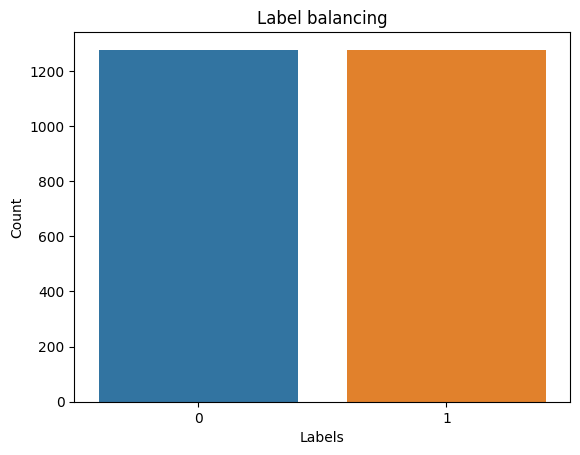

In [ ]:
fig = plt.figure(dpi=100)
ax = fig.gca()
sns.countplot(x='labels', data=df_Balanced, ax=ax)
ax.set_title("Label balancing")
ax.set_xlabel("Labels")
ax.set_ylabel("Count")

## Divide el dataset

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_Balanced, test_size=0.1, stratify=df_Balanced["labels"], random_state=42)
# train, test = train_test_split(df_Balanced, test_size=0.0004, stratify=df_Balanced["labels"], random_state=42)
len(train), len(test)

(2298, 256)

In [ ]:
df_Balanced_train = train["text"]
target_train = train["labels"]

df_Balanced_test = test["text"]
target_test = test["labels"]

## Feature engineering

In [ ]:
example_sentence = df_Balanced.iloc[431]["text"]
print(example_sentence)

pereiraenvivonoticias hace pocos minutos se registró accidente de tránsito en el ara de villa del prado al parecer el vehículo por fallas mecánicas colisiona con un puesto de arepas dejando dos personas lesionadas  


In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
tk_tokenizer = ToktokTokenizer()

tokens = tk_tokenizer.tokenize(example_sentence)
print(" # ".join(tokens))

pereiraenvivonoticias # hace # pocos # minutos # se # registró # accidente # de # tránsito # en # el # ara # de # villa # del # prado # al # parecer # el # vehículo # por # fallas # mecánicas # colisiona # con # un # puesto # de # arepas # dejando # dos # personas # lesionadas


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sp_stopwords = stopwords.words("spanish")
sp_punctuation = string.punctuation + '¿¡'

not_wanted = set((unidecode(word) for word in sp_stopwords)) | set(sp_punctuation)

tk_tokenizer = ToktokTokenizer()


def tokenize(sentence):
    clean = []
    clean_sentence = unidecode(sentence)
    for token_ in tk_tokenizer.tokenize(clean_sentence):
        token = token_.lower()
        if token in not_wanted:
            continue
        clean.append(token)
    return clean

In [ ]:
tokens = tokenize(example_sentence)
print(example_sentence)
print()
tokens = tokenize(example_sentence)
print(" # ".join(tokens))

pereiraenvivonoticias hace pocos minutos se registró accidente de tránsito en el ara de villa del prado al parecer el vehículo por fallas mecánicas colisiona con un puesto de arepas dejando dos personas lesionadas  

pereiraenvivonoticias # hace # pocos # minutos # registro # accidente # transito # ara # villa # prado # parecer # vehiculo # fallas # mecanicas # colisiona # puesto # arepas # dejando # dos # personas # lesionadas


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize)
# vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize, max_features=1000)
# vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize, min_df=0.01 )

In [ ]:
vectorizador_real.fit(df_Balanced_train)

train_x = vectorizador_real.transform(df_Balanced_train)
test_x = vectorizador_real.transform(df_Balanced_test)

## Implementación de modelo

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# Crear el clasificador base Naive Bayes
naive_bayes = MultinomialNB(alpha=0.1, fit_prior=True)

# Crear el clasificador Bagging utilizando el clasificador base Naive Bayes
# Entrenar el clasificador Bagging con los datos de entrenamiento
bagging_classifier = BaggingClassifier(base_estimator=naive_bayes, n_estimators=50, random_state=2022).fit(train_x, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
train_pred = bagging_classifier.predict(train_x)  # Para diagnosticar overfitting
test_pred = bagging_classifier.predict(test_x)  # Para decidir cambios sobre el modelo

## Revisando las métricas establecidas para el conjunto de test

In [ ]:
training_accuracy = accuracy_score(target_train, train_pred)

test_accuracy = accuracy_score(target_test, test_pred)
test_precision = precision_score(target_test, test_pred)
test_recall = recall_score(target_test, test_pred)
test_f1 = f1_score(target_test, test_pred)
test_matrix = confusion_matrix(target_test, test_pred)

print(f"Training accuracy:   {training_accuracy:0.2%}")

print(f"Test accuracy: {test_accuracy:0.2%}")
print(f"Test precision: {test_precision}")
print(f"Test recall: {test_recall}")
print(f"Test f1-score: {test_f1}")
print(f"Test Matrix: {test_matrix}")

Training accuracy:   98.61%
Test accuracy: 89.06%
Test precision: 0.8968253968253969
Test recall: 0.8828125
Test f1-score: 0.8897637795275591
Test Matrix: [[115  13]
 [ 15 113]]


## Datos de validación

In [ ]:
validation_data_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs_secondData/subtask_1/test_data.csv', names=['image', 'text'],header=None)

pd.set_option('display.max_colwidth',None)
validation_data_df.head(5)

,image,text
0,"['E_hBbp6XMAknEbw.jpg', 'E_hBbNiXMAITzrB.jpg', 'E_hBaxeXMAM58cB.jpg']",En el sector Los Hongos de Tunja se presentó un accidente de tránsito. @bomberostunja atendió la emergencia. https://t.co/617qGVw8BP
1,['E_KhOU6XIAc0mQ0.jpg'],"#TráficoSv | Reportan un accidente de tránsito en los alrededores de la zona industrial en la carretera Panamericana, en el sentido que de Santa Ana conduce hacia San Salvador. https://t.co/RDBA4L4poe"
2,['E_QPcM4XIAAaxM6.jpg'],"#13Sep #Lara Vehículo impacta contra una tubería de agua Pasadas las horas del medio día de este lunes, se registró un accidente en la carretera Centroccidental a la altura del sector Santana, del municipio Torres en Lara. Según la información aportada… https://t.co/bwZ86hCMXJ https://t.co/MvJgoKOwP3"
3,['E_LLYrEXEAUqner.jpg'],"@PNCSV confirma Accidente de tránsito en carretera Troncal del Norte a la altura del kilómetro 5 1/2, provocado por una rastra, que al parecer perdió el control, impactando contra una gasolinera. El hecho dejó dos fallecidos, un hombre y una mujer que p"
4,"['E_SRMtcXoAA_CPz.jpg', 'E_SRMXDXIAE0ZZJ.jpg']","Unidades del BCBVP atendieron emergencia por accidente de tránsito en la Avenida Pastrana, en donde una persona del sexo masculino que se movilizaba como conductor de una motocicleta, colisionó con otro velomotor lo que le ocasionó trauma en la extremidad superior derecha. https://t.co/tvYo3yAEqZ"


In [ ]:
validation_data_df.drop('image', axis=1, inplace=True)
validation_data_df

,text
0,En el sector Los Hongos de Tunja se presentó un accidente de tránsito. @bomberostunja atendió la emergencia. https://t.co/617qGVw8BP
1,"#TráficoSv | Reportan un accidente de tránsito en los alrededores de la zona industrial en la carretera Panamericana, en el sentido que de Santa Ana conduce hacia San Salvador. https://t.co/RDBA4L4poe"
2,"#13Sep #Lara Vehículo impacta contra una tubería de agua Pasadas las horas del medio día de este lunes, se registró un accidente en la carretera Centroccidental a la altura del sector Santana, del municipio Torres en Lara. Según la información aportada… https://t.co/bwZ86hCMXJ https://t.co/MvJgoKOwP3"
3,"@PNCSV confirma Accidente de tránsito en carretera Troncal del Norte a la altura del kilómetro 5 1/2, provocado por una rastra, que al parecer perdió el control, impactando contra una gasolinera. El hecho dejó dos fallecidos, un hombre y una mujer que p"
4,"Unidades del BCBVP atendieron emergencia por accidente de tránsito en la Avenida Pastrana, en donde una persona del sexo masculino que se movilizaba como conductor de una motocicleta, colisionó con otro velomotor lo que le ocasionó trauma en la extremidad superior derecha. https://t.co/tvYo3yAEqZ"
...,...
1148,#LoÚltimo | Socorristas de Cruz Roja Salvadoreña atendieron a motociclista que sufrió un accidente de tránsito y resultó con una fractura en su miembro superior izquierdo. Foto: cortesía. https://t.co/LDQt3hwVzx
1149,"Por dárselas de 'Superman' agrediendo a su pareja, fue puesto a disposición por el delito de violencia intrafamiliar, procedimiento realizado en Villahermosa #Medellín. Denuncie Línea 155 para atención a mujeres víctimas de maltrato. #PatrullaEnCasa #SomosUnoSomosTodos https://t.co/1KFpHzIEQh"
1150,"Cae sujeto vinculado al robo de medicinas contra el cáncer en Iztapalapa: Portaba dinero en efectivo del que no pudo comprobar su procedencia; el sospechoso fue trasladado a la Fiscalía capitalina, donde será interrogado https://t.co/a9yXT4Yfun (vía ElUniversal) https://t.co/r41nhHeGzC"
1151,"Nuestras unidades R-1 y H-3 trabajan en accidente de tránsito en Calle el Canelo con Casanova, se trata de colisión de dos vehículos menores 5 personas involucradas. https://t.co/cPoRDZskXL"


In [ ]:
validation_data_df['text'] = validation_data_df['text'].apply(clean_text)
validation_data_df

,text
0,en el sector los hongos de tunja se presentó un accidente de tránsito atendió la emergencia
1,tráficosv reportan un accidente de tránsito en los alrededores de la zona industrial en la carretera panamericana en el sentido que de santa ana conduce hacia san salvador
2,13sep lara vehículo impacta contra una tubería de agua pasadas las horas del medio día de este lunes se registró un accidente en la carretera centroccidental a la altura del sector santana del municipio torres en lara según la información aportada
3,confirma accidente de tránsito en carretera troncal del norte a la altura del kilómetro 5 12 provocado por una rastra que al parecer perdió el control impactando contra una gasolinera el hecho dejó dos fallecidos un hombre y una mujer que p
4,unidades del bcbvp atendieron emergencia por accidente de tránsito en la avenida pastrana en donde una persona del sexo masculino que se movilizaba como conductor de una motocicleta colisionó con otro velomotor lo que le ocasionó trauma en la extremidad superior derecha
...,...
1148,loúltimo socorristas de cruz roja salvadoreña atendieron a motociclista que sufrió un accidente de tránsito y resultó con una fractura en su miembro superior izquierdo foto cortesía
1149,por dárselas de superman agrediendo a su pareja fue puesto a disposición por el delito de violencia intrafamiliar procedimiento realizado en villahermosa medellín denuncie línea 155 para atención a mujeres víctimas de maltrato patrullaencasa somosunosomostodos
1150,cae sujeto vinculado al robo de medicinas contra el cáncer en iztapalapa portaba dinero en efectivo del que no pudo comprobar su procedencia el sospechoso fue trasladado a la fiscalía capitalina donde será interrogado vía eluniversal
1151,nuestras unidades r1 y h3 trabajan en accidente de tránsito en calle el canelo con casanova se trata de colisión de dos vehículos menores 5 personas involucradas


In [ ]:
df_Balanced_val = validation_data_df['text']
df_Balanced_val

0                                                                                                                                                                                         en el sector los hongos de tunja se presentó un accidente de tránsito  atendió la emergencia  
1                                                                                                         tráficosv  reportan un accidente de tránsito en los alrededores de la zona industrial en la carretera panamericana en el sentido que de santa ana conduce hacia san salvador  
2                          13sep lara vehículo impacta contra una tubería de agua  pasadas las horas del medio día de este lunes se registró un accidente en la carretera centroccidental a la altura del sector santana del municipio torres en lara  según la información aportada    
3                                     confirma  accidente de tránsito en carretera troncal del norte a la altura del kilómetro 5 12 provocado por una rastra 

In [ ]:
val_x = vectorizador_real.transform(df_Balanced_val)
val_x

<1153x10925 sparse matrix of type '<class 'numpy.int64'>'
	with 15908 stored elements in Compressed Sparse Row format>

In [ ]:
val_pred = bagging_classifier.predict(val_x)

In [ ]:
from google.colab import files

val_pred_df = pd.DataFrame(val_pred)
val_pred_df.to_csv('submission1-TXT.csv', index=False, header=None)
!zip -r '/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/Solve/txt/task1/result1/submission1-TXT.zip' 'submission1-TXT.csv'


updating: submission1-TXT.csv (deflated 88%)


In [ ]:
files.download('/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/Solve/txt/task1/result1/submission1-TXT.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# BERT (Bidirectional Encoder Representations from Transformers) -> BETO

## Emojis a palabras con un diccionario
##  -> Análisis de sentimientos: Aumento columnas con emociones. Eventos violentos contienen más emociones negativoas, ¿Qué emociones contienen los eventos no violentos?
##  -> Distribución de etiquetas de cada clase para la task2 (multiclase)

In [ ]:
# from nltk.stem import SnowballStemmer
# from sklearn.naive_bayer import MultimonialNB
  # Alpha = MultimonialNB(alpha=2)

In [ ]:
# Pruebas con y sin stopworlds
# No asumir nada y hacer experimentación